<a href="https://colab.research.google.com/github/ewolfjr2-sdi/scikitlearn-decisiontreeclassifier/blob/main/Decision_Tree_Classifier_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DecisionTreeClassifier
DecisionTreeClassifier is a class in the sklearn.tree module that implements a decision tree classifier. Decision tree classifiers are a type of supervised machine learning model that can be used for classification tasks. They work by learning a hierarchy of if/else questions that can be used to predict the class of a given data point.

To use DecisionTreeClassifier, you will need to have a training dataset that includes both input features and a target variable. You can then fit the classifier to the training data using the fit method. Once the classifier is trained, you can use the predict method to predict the class labels of new data points.

DecisionTreeClassifier has a number of parameters that can be used to control the learning process, such as max_depth to control the maximum depth of the tree and min_samples_split to specify the minimum number of samples required to split a node.

Overall, DecisionTreeClassifier is a simple and effective tool for solving classification problems. It is widely used in a variety of applications and is a good choice for those who are new to machine learning.

Steps:

1. Import Data
2. Clean the Data (optional)
3. Split the Data into Training/Test Sets
4. Create a Model
5. Train the Model
6. Make Predictions
7. Evaluate and Improve

Libraries

- Numpy
- Pandas
- MatPlotLib
- Scikit-Learn

## 1. Import Data

For this project we will be importing [ecommerce customer behavioral data](https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store?resource=download&select=2019-Nov.csv) from kaggle. Turning it into a pandas DataFrame. Cleaning the data and then running it through a ML model for analysis.

This file contains behavior data for 2 months (from October 2019 and November 2019) from a large multi-category online store.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

In [ ]:
# Install the Kaggle library.
! pip install kaggle

# Make a directory named ".kaggle".
! mkdir ~/.kaggle

# Copy your "kaggle.json" file into this new directory.
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

# Download your dataset with the kaggle API command.
! kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 4.28G/4.29G [00:40<00:00, 140MB/s]
100% 4.29G/4.29G [00:40<00:00, 114MB/s]


In [ ]:
# Finally, unzip the file if it was downloaded as a zip file.
! unzip ecommerce-behavior-data-from-multi-category-store.zip


Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            


Now that we have the data imported, we need to turn it into a pandas DataFrame so we can manipulate it in python.

In [2]:
# Import the pandas package.
import pandas as pd

# Create the DataFrame.
df = pd.read_csv('2019-Oct.csv')

# Get summary stats to make sure data looks ok.
df.shape


(414117, 9)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414117 entries, 0 to 414116
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     414117 non-null  object 
 1   event_type     414116 non-null  object 
 2   product_id     414116 non-null  float64
 3   category_id    414116 non-null  float64
 4   category_code  283223 non-null  object 
 5   brand          355062 non-null  object 
 6   price          414116 non-null  float64
 7   user_id        414116 non-null  float64
 8   user_session   414116 non-null  object 
dtypes: float64(4), object(5)
memory usage: 28.4+ MB


In [4]:
df.describe()


,product_id,category_id,price,user_id
count,4.141160e+05,4.141160e+05,414116.000000,4.141160e+05
mean,1.005791e+07,2.056120e+18,291.529079,5.310621e+08
std,1.099636e+07,1.520118e+16,364.416479,1.651869e+07
min,1.001588e+06,2.053010e+18,0.000000,2.449511e+08
25%,1.005115e+06,2.053010e+18,63.060000,5.156170e+08
50%,5.100285e+06,2.053010e+18,155.610000,5.267121e+08
75%,1.570008e+07,2.053010e+18,360.080000,5.477264e+08
max,5.390001e+07,2.175420e+18,2574.070000,5.555608e+08


In [5]:
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062.0,2.103810e+18,NaN,shiseido,35.79,541312140.0,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821.0,2.053010e+18,appliances.environment.water_heater,aqua,33.20,554748717.0,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506.0,2.053010e+18,furniture.living_room.sofa,NaN,543.10,519107250.0,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067.0,2.053010e+18,computers.notebook,lenovo,251.74,550050854.0,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237.0,2.053010e+18,electronics.smartphone,apple,1081.98,535871217.0,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


## 2. Clean the Data

As we can see from the summary, our data has some NULL values in the columns 'category_code' and 'brand'. This could interfer with our models predictions, so lets remove any NULL rows from the DataFrame.

In [6]:
df = df.dropna(subset=['category_code', 'brand'])

# Let's print the summary to make sure we removed all NULL values.
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261380 entries, 1 to 414114
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     261380 non-null  object 
 1   event_type     261380 non-null  object 
 2   product_id     261380 non-null  float64
 3   category_id    261380 non-null  float64
 4   category_code  261380 non-null  object 
 5   brand          261380 non-null  object 
 6   price          261380 non-null  float64
 7   user_id        261380 non-null  float64
 8   user_session   261380 non-null  object 
dtypes: float64(4), object(5)
memory usage: 19.9+ MB


Now let's make sure to deduplicate our data as the last step in cleaning.

In [7]:
clean_df = df.drop_duplicates(subset=[
    'event_time'
  , 'event_type'
  , 'product_id'
  , 'category_id'
  , 'category_code'
  , 'brand'
  , 'user_id'
  , 'user_session'
])

# Let's print the summary one more time to check if any additional rows were removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261380 entries, 1 to 414114
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     261380 non-null  object 
 1   event_type     261380 non-null  object 
 2   product_id     261380 non-null  float64
 3   category_id    261380 non-null  float64
 4   category_code  261380 non-null  object 
 5   brand          261380 non-null  object 
 6   price          261380 non-null  float64
 7   user_id        261380 non-null  float64
 8   user_session   261380 non-null  object 
dtypes: float64(4), object(5)
memory usage: 19.9+ MB


Now that we have imported and cleaned our data we are ready to move on to step 3 where we split the data into training/test sets.

## 3. Split the Data into Training/Test Sets

Before we define training and test sets we need to specify the input and output datasets for our prediction model.

We do this by assigning 2 new datasets...
- First dataset will be the input which is the metrics we want our model to evaluate
- Second dataset is the prediction values we want our model to make

In [8]:
# First let's get all the column names in our dataset.
clean_df.columns


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

For this model we want to make predictions about what 'brand' users are likely to buy from based on 'category_id', 'product_id' and 'price'

In [55]:
from datetime import datetime
# Our input dataset will be X, so we need to drop all columns other than 'category_id', 'product_id' and 'price'.
X = clean_df.drop(columns=[ 
    'event_type'
    , 'event_time'
    , 'category_code'
    , 'brand'
    , 'user_id'
    , 'user_session'
])

# Let's print the dataframe to make sure we have the correct columns.
print(X.info())

# Our output dataset will be y, so we need to drop all columns other than 'brand'.
y = clean_df.drop(columns=[
    'event_type'
    , 'event_time'
    , 'product_id'
    , 'category_id'
    , 'category_code'
    , 'price'
    , 'user_id'
    , 'user_session'
])

# y['c'] = y['event_type'] + ', ' + y['brand']
# print(y.info())

# y = y.drop(columns=['event_type', 'brand'])

# If you arent going to visualize your tree you can add this step to remove the header from your y dataset for better model accuracy.
# y.rename(columns=y.iloc[0, :], inplace=True) 

# Let's print the dataframe again to make sure we have the correct data.
print(y.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261193 entries, 1 to 414114
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   product_id   261193 non-null  float64
 1   category_id  261193 non-null  float64
 2   price        261193 non-null  float64
dtypes: float64(3)
memory usage: 8.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 261193 entries, 1 to 414114
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   brand   261193 non-null  object
dtypes: object(1)
memory usage: 4.0+ MB
None


Now we can split our datasets into training and test sets

In [56]:
# Import packages.
from sklearn.model_selection import train_test_split

# Split the data into 4 new datasets, 2 for training and 2 for testing.
# It is good to allocate about 20% of your data to testing which is why we set the test_size=0.2.
# you can adjust this setting later to optimize your model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Let's check our new datasets.
print(X_train.info())
print(X_test.info())
print(y_train.info())
print(y_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 208954 entries, 54246 to 181591
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   product_id   208954 non-null  float64
 1   category_id  208954 non-null  float64
 2   price        208954 non-null  float64
dtypes: float64(3)
memory usage: 6.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52239 entries, 116690 to 78544
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   52239 non-null  float64
 1   category_id  52239 non-null  float64
 2   price        52239 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 208954 entries, 54246 to 181591
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   brand   208954 non-null  object
dtypes: object(1)
memory usage: 3

## 4. Create the Model

Now that we have created our input, output, training and test datasets we can begin to build our model using DecisionTreeClassifier

In [67]:
# Import DecisionTreeClassifier from sklearn.tree.
from sklearn.tree import DecisionTreeClassifier

# Define model.
# you can adjust DecisionTreeClassifier(max_depth=) or (min_samples_split=) to tune the accuracy of the model 
# or show a more readable visual plot tree.
model = DecisionTreeClassifier()


## 5. Train the Model

In [68]:
# Fit the training sets into your model.
model.fit(X_train, y_train)


DecisionTreeClassifier()

## 6. Make Predictions

With our model built and trained we can now start to make predictions. We will use our test datasets to check the accuracy of our model.

In [69]:
# Create a variable called predictions and run the predict function for your model.
# pass in your X_test dataset.
predictions = model.predict(X_test)

# Print the results.
predictions


array(['scarlett', 'huawei', 'apple', ..., 'nike', 'huawei', 'xiaomi'],
      dtype=object)

## 7. Evaluate and Improve

Now that we know our model is working we need to test the accuracy.

We do this by comparing the prediction results of the 'X_test' dataset to the values in the 'y_test' dataset

In [70]:
# Import accuracy_score from sklearn.metrics.
from sklearn.metrics import accuracy_score

# Create a variable called score and call the accuracy_score function.
# Evaulate the accuracy of the predictions against your y-test dataset
score = accuracy_score(y_test, predictions)

# Print the results.
print("Accuracy: " + str(round(score * 100, 1)) + "%")

Accuracy: 98.7%


# Persist and Load Models

So to this point we have imported our dataset, cleaned it, split our cleaned data into training and test sets, created our model, trained it and asked it to make predictions.

The next and most important step is model persistence...

Model persistence is important in machine learning because it allows you to save the trained model to a file and then use it later without having to retrain the model from scratch. This can be particularly useful in cases where training a model is computationally expensive or time-consuming.

By saving the trained model to a file, you can load it later and use it to make predictions on new data without having to go through the training process again. This can save you a lot of time and resources, especially if you need to make many predictions or if you need to deploy the model in a production environment.

Model persistence is also useful for storing and comparing different versions of a model. For example, you might want to save different versions of a model that was trained using different hyperparameters or different training datasets. By storing these models, you can easily compare their performance and choose the one that performs best.

Overall, model persistence is an important aspect of machine learning that can help you save time and resources while also making it easier to deploy and maintain your machine learning models.

# Visualizing a Decision Tree

A decision tree classifier plot tree is a graphical representation of a decision tree model. It shows the internal structure of the model, which consists of a series of decisions based on the features of the data. Each internal node in the tree represents a decision based on a specific feature, and the branches emanating from the node represent the possible outcomes of that decision. The leaf nodes of the tree represent the final classification of the data based on the sequence of decisions made by the model.

The tree is typically visualized as a rectangular box, with the decision at the top and the possible outcomes branching out below it. The tree can be read from top to bottom, with each internal node representing a decision and each leaf node representing a final classification. The tree can be used to make predictions about the class of new data by following the sequence of decisions in the tree until a leaf node is reached.

A decision tree classifier plot tree is a useful tool for understanding the decision-making process of a machine learning model, as it allows you to see how the model is making its predictions based on the features of the data. It can also be used to identify patterns and trends in the data that may not be immediately apparent from a simple summary of the data.






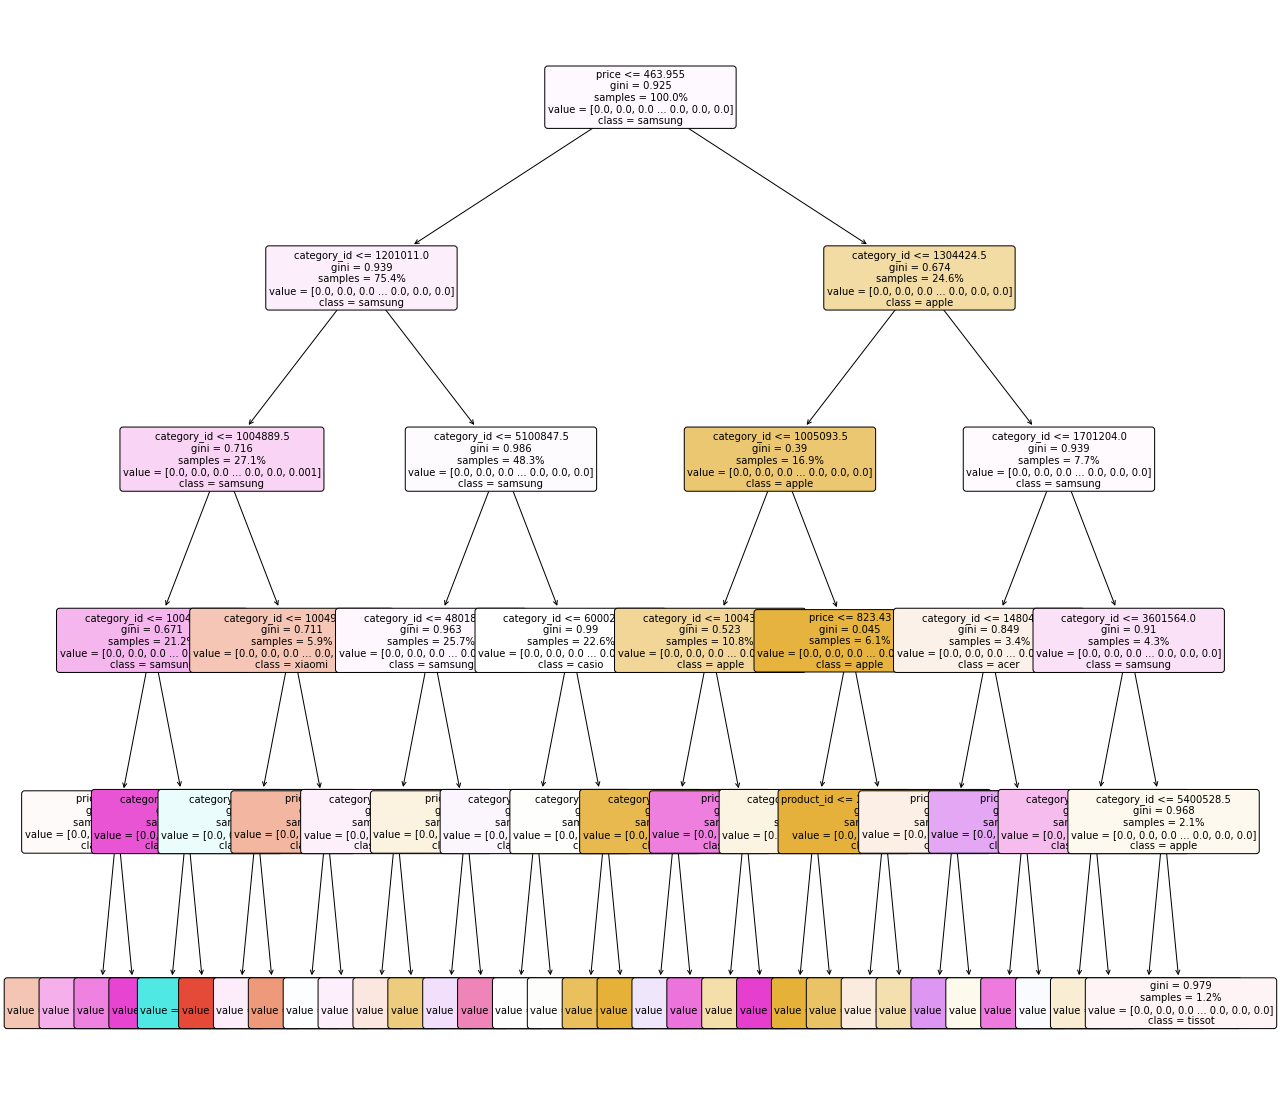

In [66]:
# This visualization was created with the model at max_depth=5
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))

plot_tree(model,
          feature_names=['category_id', 'product_id', 'price'],
          class_names=sorted(y_train['brand'].unique()),
          rounded=True,
          filled=True,
          proportion=True,
          fontsize=10
)

plt.show()
